In [34]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import copy


In [35]:
##Functions
def t(x,i):
    if i == 1 :
        a = x/2
        return a
    else:
        a = (x+1)/2
        return a

def inv(x,n):
    return math.floor(x*n)

def tf(F,j):
    n = F.size
    Aux = copy.deepcopy(F)
    
    for i in range(n):
        x = i/n
        x = t(x,j)
        Aux[i] = F[inv(x,n)]
    return Aux


def A(x):
    return pow(math.sin(2*math.pi*x),1)

def Avector(n):
    AV = np.zeros(n)
    for i in range(n):
        AV[i] = A(i/n)
    return AV

def G(N,n):
    F = np.zeros(n)
    for i in range(N):
        F1 = tf(F,1)
        F2 = tf(F,2)
        for j in range(n):
            F1[j] = F1[j] + A(t(j/n,1))
            F2[j] = F2[j] + A(t(j/n,2))
        F = (np.maximum(F1,F2)+F)/2
        F = F - np.amax(F)
    return [F,F1,F2]

#T 2xmod1
def T(F):
    Aux = copy.deepcopy(F)
    n = F.size
    for i in range(n):
        x = i/n
        x = 2*x
        if x > 1:
            x = x - 1
        j = math.floor(n*x)
        if j>=n:
            j=n-1
        
        Aux[i] = F[j]
    return Aux

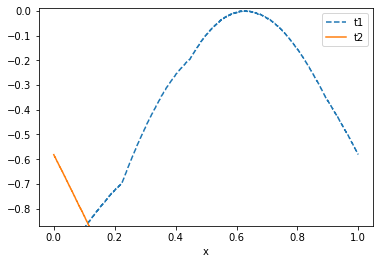

In [37]:
## G Iterations and plot
n = 2000
N = 30
Result = G(N,n)
F1 = Result[1]
F2 = Result[2]
yup = max(np.amax(F1),np.amax(F2))
F1 = F1 - yup
F2 = F2 - yup

F = list(F1)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x","t1"])

F = list(F2)
X = list(np.array(range(n))/n)
D = list(zip(X,F))

Resultd2 = pd.DataFrame(data = D ,columns = ["x","t2"])

ymin = np.amin(Result[0])

##PLOT
ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1],style = '--');
Resultd2.plot(ax=ax,x = Resultd2.columns.values[0], y = Resultd2.columns.values[1]);
ax.set_ylim([ymin-0.01,0.01])


#save plot
ax.figure.savefig('../imagens/ex3_branches.pdf')

In [4]:
#Analytical branches
def V1(x,ns):
    res = 0
    for i in range(ns):
        res = res + pow(math.sin(math.pi*(2/3+pow(-1/2,i)*(x-2/3))),2)-pow(math.sin(2*math.pi /3),2)
    return res

def V2(x,ns):
    res = 0
    for i in range(ns):
        res = res + pow(math.sin(math.pi*(2/3+pow(-1/2,i)*(1/3-x))),2)-pow(math.sin(2*math.pi /3),2)
    return res
    

def V(n,j,ns):
    F = np.zeros(n)
    for i in range(n):
        if j == 1:
            F[i] = V1(i/n,ns)
        if j == 2:
            F[i] = V2(i/n,ns)
    return F

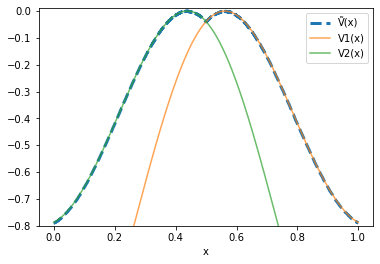

In [5]:
#Comparison plot

ns = 10
v1 = V(n,1,ns)
v2 = V(n,2,ns)


yup = np.amax(np.concatenate([v1,v2]))
v1 = v1- yup
v2 = v2- yup
ymin = np.amin(Result[0])

F = list(Result[0])
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x","Ṽ(x)"])
ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1],style = '--',linewidth=3);

F = list(v1)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
dV1 = pd.DataFrame(data = D ,columns = ["x","V1(x)"])
dV1.plot(ax=ax,x = dV1.columns.values[0], y = dV1.columns.values[1],alpha = 0.7);

F = list(v2)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
dV2 = pd.DataFrame(data = D ,columns = ["x","V2(x)"])
dV2.plot(ax=ax,x = dV2.columns.values[0], y = dV2.columns.values[1],alpha = 0.7);

ax.set_ylim([ymin-0.01,0.01])


ax.figure.savefig('../imagens/ex3_compare.pdf')


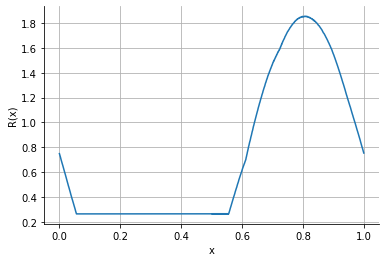

In [39]:
# R function
VT = T(Result[0])
mA = 0.75
AA = Avector(2000)

F = list(VT-Result[0]-AA+mA)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x",""])
ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1],label='');

ax.grid(True, which='both')
seaborn.despine(ax=ax, offset=0)
ax.get_legend().set_visible(False)
ax.set_ylabel('R(x)')
ax.figure.savefig('../imagens/ex3_R.pdf')
